# Drug Review

### DEPENDENCIES AND READ

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
df  = pd.read_csv("dataset/train.csv",parse_dates=['drug_approved_by_UIC'])
df_test  = pd.read_csv("dataset/test.csv",parse_dates=['drug_approved_by_UIC'])

### RENAME COLUMNS AND CHECKING INTEGRITY

Renaming columns for quick access and easier coding.

In [3]:
cols = df.columns
new_col = ["id","name","use","review","effect","UIC","presc","score"]
df.rename(columns={ k:v for (k,v) in zip(cols, new_col)},inplace=True)
df_test.rename(columns={ k:v for (k,v) in zip(cols, new_col)},inplace=True)

In [4]:
df.shape, df_test.shape

((32165, 8), (10760, 7))

In [5]:
#CHECKING NULLS
df.isnull().sum()

id        0
name      0
use       0
review    0
effect    0
UIC       0
presc     0
score     0
dtype: int64

In [6]:
df.isna().sum()

id        0
name      0
use       0
review    0
effect    0
UIC       0
presc     0
score     0
dtype: int64

In [7]:
df.describe()

,id,effect,presc,score
count,32165.000000,32165.000000,32165.000000,32165.000000
mean,115487.511052,6.998912,27.893207,6.664261
std,67146.156602,3.274781,35.819035,1.588699
min,9.000000,1.000000,0.000000,0.899076
25%,56922.000000,5.000000,6.000000,6.109307
50%,115776.000000,8.000000,16.000000,6.788245
75%,173562.000000,10.000000,36.000000,7.900790
max,232289.000000,10.000000,771.000000,8.992453


The mean of score, effect and prescription are 6.9, 6.66 and 28 respectively, with their standard deviation being 3.27, 1.58 and 36.

In [8]:
df[['name','use','review']].describe(include = 'object')

,name,use,review
count,32165,32165,32165
unique,2220,636,30121
top,Levonorgestrel,Birth Control,"""Good"""
freq,724,5795,8


### DATA CLEANING AND INDEXING

Removing unneccesary and redundant columns to imporove model interpretability and accuracy.

In [9]:
#COMPARING UNIQUE DRUG NAMES WITH UNIQUE USE CASES
print(f"Lenght of unique patient ids -> {len(df.id.unique())} \nLenght of unique drug names -> {len(df.name.unique())} \nLenght of unique drug use cases -> {len(df.use.unique())}")

Lenght of unique patient ids -> 32165 
Lenght of unique drug names -> 2220 
Lenght of unique drug use cases -> 636


In [10]:
df_test.groupby("use").count()[:23].sort_index()['id'].sum()

60

In [11]:
print(f'Total number of redundant rows in columns ->{df.groupby("use").count()[:39].sort_index()["id"].sum()}')

Total number of redundant rows in columns ->179


In [12]:
df_test.use.sort_values()[:60],
df.use.sort_values()[:180] #CONFIRMING FIRST 179 ROWS of "Use" AS REDUNDANT#CONFIRMING FIRST 179 ROWS of "Use" AS REDUNDANT

2463     0</span> users found this comment helpful.
10437    0</span> users found this comment helpful.
26905    0</span> users found this comment helpful.
25932    0</span> users found this comment helpful.
31024    0</span> users found this comment helpful.
                            ...                    
18381    9</span> users found this comment helpful.
22781    9</span> users found this comment helpful.
24561    9</span> users found this comment helpful.
20660    9</span> users found this comment helpful.
11640                                          ADHD
Name: use, Length: 180, dtype: object

Some of the use cases of the drugs have not been recorded properly as can be noted from the preceeding table. The best practice might suggest removing the same for a cleaner analysis. The cell below extracts all the rows that have been improperly recorder. 

In [13]:
import re
remove = re.findall("[0-9]+</span> users found this comment helpful."," ".join(df['use'].sort_values().array))
remove_test = re.findall("[0-9]+</span> users found this comment helpful."," ".join(df_test['use'].sort_values().array))

In [14]:
len(remove),len(remove_test)

(179, 60)

Matching the text from the rows with regex and deleting them by replacing them as index.

In [15]:
dff = df.set_index('use').drop(index=remove).reset_index()

In [16]:
dff_test = df_test.set_index('use').drop(index=remove_test).reset_index()

Checking to see if any redundant row remain and verify size

In [17]:
list(dff_test.use.unique()) in remove_test

False

In [18]:
dff #UNINDEXED DATAFRAME

,use,id,name,review,effect,UIC,presc,score
0,Left Ventricular Dysfunction,206461,Valsartan,"""It has no side effect, I take it in combinati...",9,2012-05-20,27,8.022969
1,ADHD,95260,Guanfacine,"""My son is halfway through his fourth week of ...",8,2010-04-27,192,7.858458
2,Birth Control,92703,Lybrel,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17,6.341969
3,Opiate Dependence,35696,Buprenorphine / naloxone,"""Suboxone has completely turned my life around...",9,2016-11-27,37,6.590176
4,Benign Prostatic Hyperplasia,155963,Cialis,"""2nd day on 5mg started to work with rock hard...",2,2015-11-28,43,6.144782
...,...,...,...,...,...,...,...,...
31981,Anxiety,183202,Cymbalta,"""I have been taking Cymbalta for 15 months now...",9,2013-06-10,89,6.963020
31982,Birth Control,109111,Nexplanon,"""I have had the Nexplanon since Dec. 27, 2016 ...",6,2017-04-06,0,0.899076
31983,Panic Disorde,121154,Venlafaxine,"""Had panic attacks and social anxiety starting...",9,2016-11-10,25,6.241812
31984,Obsessive Compulsive Disorde,45410,Fluoxetine,"""I have been off Prozac for about 4 weeks now....",8,2015-01-21,22,7.940428


In [19]:
len(dff_test) + 60 == len(df_test)

True

Setting multi-level index in the order use > name > id

In [20]:
index = pd.MultiIndex.from_frame(dff[["use","name","id"]],names=['USAGE','NAME','PATIENT ID'])

In [21]:
index_test = pd.MultiIndex.from_frame(dff_test[["use","name","id"]],names=['USAGE','NAME','PATIENT ID'])

In [22]:
dfn=dff.set_index(index).sort_index().drop(['use','id','name'],axis=1)

In [23]:
dfn_test = dff_test.set_index(index_test).sort_index().drop(['use','id','name'],axis=1)

In [24]:
dffdd = dff.groupby(['use','name']).mean().drop('id',axis=1)

In [25]:
dffdd.to_csv("train_indexed_grouped.csv")

Alternate indexing by UIC approval date

In [26]:
index = pd.MultiIndex.from_frame(dff[['UIC','id']],names=['APPROVAL DATE','PATIENT ID'])
dfa = dff.set_index(index).sort_index().drop(['UIC','id'],axis=1)
dfa

use           name  \
APPROVAL DATE PATIENT ID                                       
2008-02-24    46914                   Obesity        Xenical   
2008-02-25    14167                  Neuritis  Triamcinolone   
              36858                      Pain       Fentanyl   
              69679         Opiate Dependence  Buprenorphine   
              188914             Breast Cance       Arimidex   
...                                       ...            ...   
2017-12-11    190110                     GERD       Protonix   
              229284            Schizophrenia     Lurasidone   
              231284                 Insomnia      Trazodone   
2017-12-12    46802                   Obesity        Xenical   
              160088      Atrial Fibrillation    Rivaroxaban   

                                                                     review  \
APPROVAL DATE PATIENT ID                                                      
2008-02-24    46914       "Xenical really helped me, but some of the bow...   
2008-02-25    14167              "this drug worked for me but is very slow"   
              36858       "I don&#039;t think I could make it without th...   
              69679       "it&#039;s works great if your REALLY ready to...   
              188914      "Debilitating joint and bone pain forced me of...   
...                                                                     ...   
2017-12-11    190110      "I have had acid reflux, for 10 years. I&#039;...   
              229284      "At first I thought I had found a *miracle med...   
              231284      "Worst drug on market for sleep and I can&#039...   
2017-12-12    46802       "So I started just over a week ago, if you eat...   
              160088      "I made a comment here a couple of years ago w...   

                          effect  presc     score  
APPROVAL DATE PATIENT ID                           
2008-02-24    46914            7     50  2.386411  
2008-02-25    14167            7      2  5.771317  
              36858           10     22  8.757201  
              69679            8     78  7.760232  
              188914           2    292  8.306315  
...                          ...    ...       ...  
2017-12-11    190110           4      0  5.793134  
              229284           3      0  6.355041  
              231284           1      0  3.054420  
2017-12-12    46802           10      0  6.109307  
              160088           1      0  3.054420  

[31986 rows x 6 columns]

### VISUAL ANALYSIS AND INFERENCE
Answering questions about the data, using visual analysis

In [27]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 8]

Describing the distributions of the various features, both numeric and categorical, with descriptive stats.

C:\Users\Manax\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Manax\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'PRESCRIPTION HISTOGRAM(sqrt)')

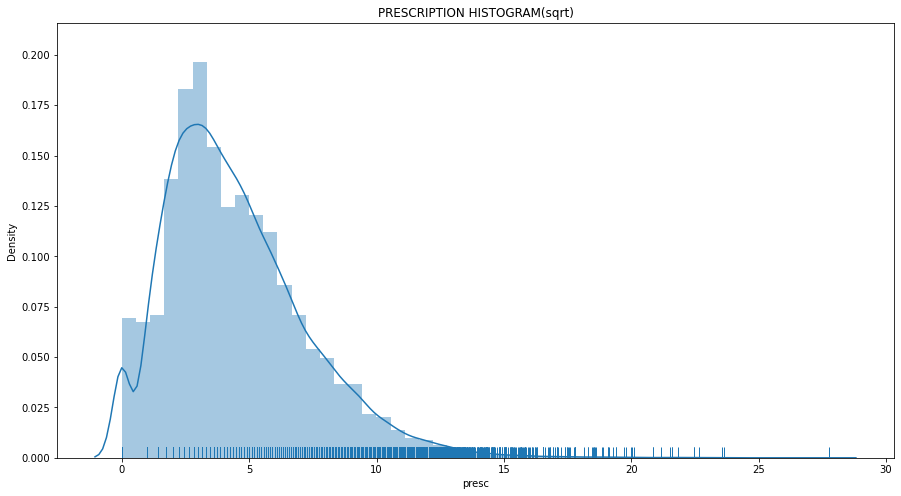

In [28]:
sns.distplot(np.sqrt(dff.presc),rug=True)
plt.title("PRESCRIPTION HISTOGRAM(sqrt)")

Text(0.5, 1.0, 'TOP 50 MOST PRESCRIBED DRUGS BY NAME')

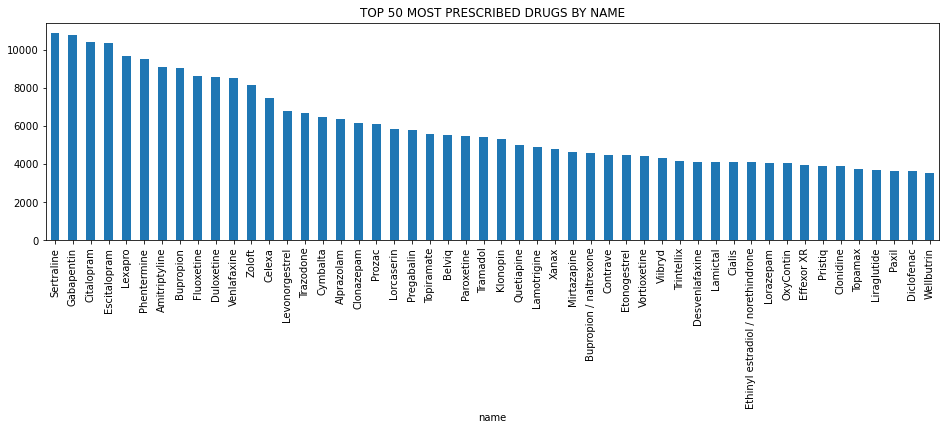

In [29]:
dff.groupby(dff.name)['presc'].sum().sort_values(ascending=False)[:50].plot(kind='bar',figsize=(16,4))
plt.title("TOP 50 MOST PRESCRIBED DRUGS BY NAME")

Text(0.5, 1.0, 'TOP 50 MOST PRESCRIBED DRUGS BY USE')

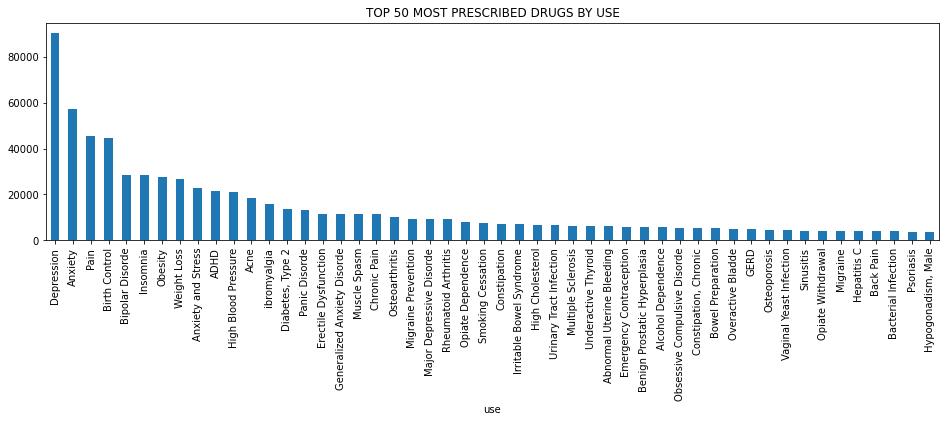

In [30]:
dff.groupby(dff.use)['presc'].sum().sort_values(ascending=False)[:50].plot(kind='bar',figsize=(16,4))
plt.title("TOP 50 MOST PRESCRIBED DRUGS BY USE")

Text(0.5, 1.0, 'TOP 50 MOST LISTED DRUGS NAMES')

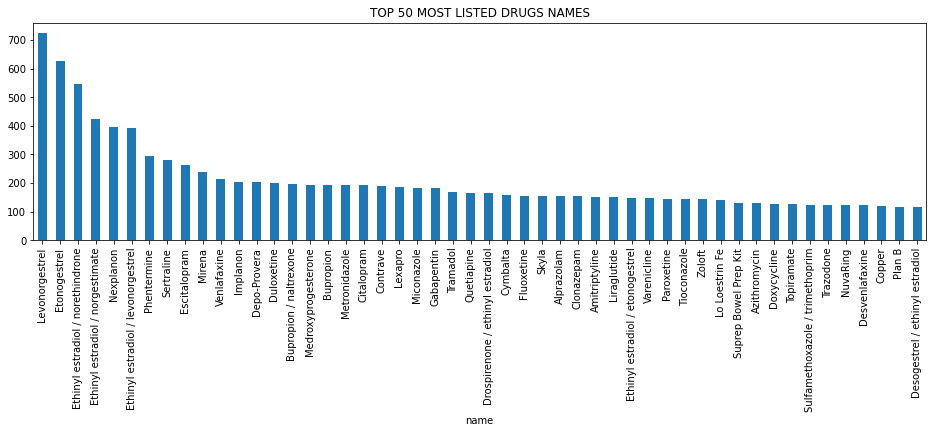

In [31]:
dff.groupby(dff.name).size().sort_values(ascending=False)[:50].plot(kind='bar',figsize=(16,4))
plt.title("TOP 50 MOST LISTED DRUGS NAMES")

Text(0.5, 1.0, 'TOP 50 MOST LISTED DRUG USES')

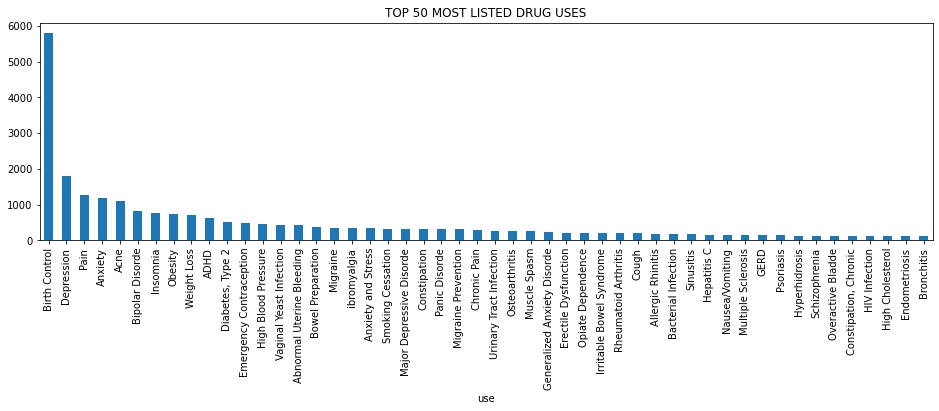

In [32]:
dff.groupby(dff.use).size().sort_values(ascending=False)[:50].plot(kind='bar',figsize=(16,4))
plt.title("TOP 50 MOST LISTED DRUG USES")

Drugs for birthcontrol, pain and depression are of the highest prescribed among all. The number of prescriptions for a given drug is usually on the lower 25th percetile. The most prescribed drug use is depression and the most listed drug use is birthcontrol. The most prescribed drugs are Sertaline, Gabapentin and Citalopram, where as, the most listed drugs are Levonorgestrel, Etonogestrel and Northindrone. 

Text(0, 0, 'Score & Prescription')

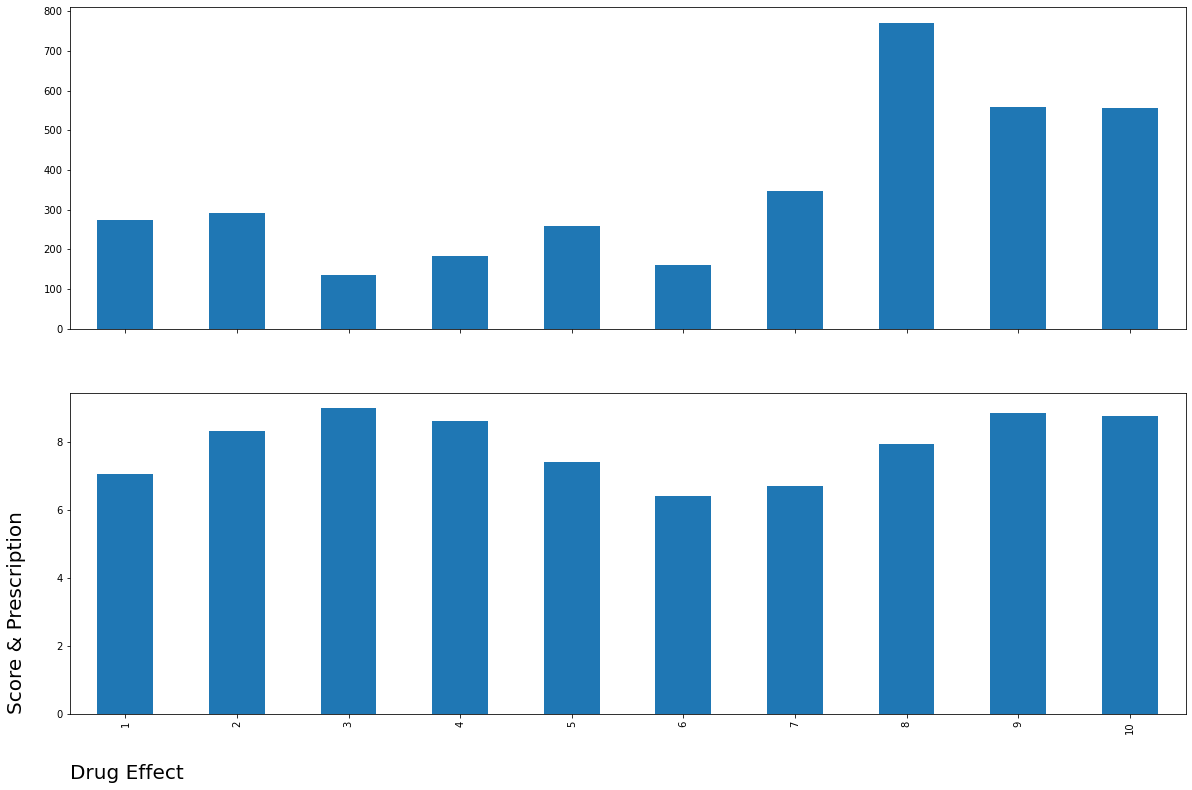

In [33]:
fig, axes = plt.subplots(nrows=2,ncols=1,sharex='row')

dfgt = dff[['name','use','effect','score','presc']]
plot1 = dfgt.groupby(dff.effect)['presc'].max()
plot2 = dfgt.groupby(dff.effect)['score'].max()
for plot,axes in list(zip([plot1,plot2],[axes[0],axes[1]])):
    plot.plot(kind='bar',figsize=(20,13),ax=axes,sharex=True)
    axes.set_xlabel("")
axes.set_xlabel("Drug Effect",loc='left',labelpad=30,size=20)
axes.set_ylabel("Score & Prescription",loc='bottom',labelpad=30,size=20)

Maximum number of prescriptions and score given to a drug, grouped by its use. 

Text(0, 0, 'Prescription, Score & Effect')

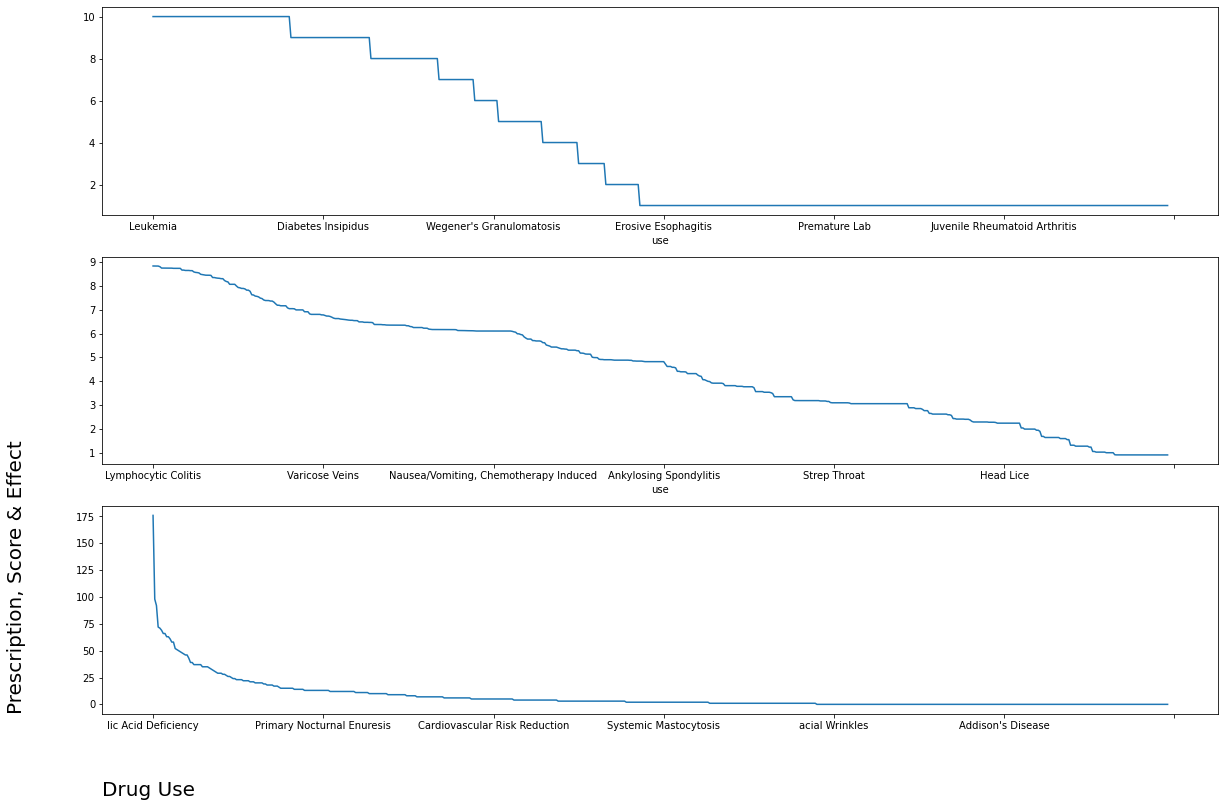

In [34]:
fig, axes = plt.subplots(nrows=3,ncols=1,sharex='row')

dfgt = dff[['name','use','effect','score','presc']]
plot1 = dfgt.groupby(dff.use)['effect'].min().sort_values(ascending=False)
plot2 = dfgt.groupby(dff.use)['score'].min().sort_values(ascending=False)
plot3 = dfgt.groupby(dff.use)['presc'].min().sort_values(ascending=False)

for plot,axes in list(zip([plot1,plot2,plot3],[axes[0],axes[1],axes[2]])):
    plot.plot(kind='line',figsize=(20,13),ax=axes,sharex=False)
axes.set_xlabel("Drug Use",loc='left',labelpad=50,size=20)
axes.set_ylabel("Prescription, Score & Effect",loc='bottom',labelpad=50,size=20)


Grouped by drug use, aggregated by minimum of the respective effect, score and prescription

Text(0, 0, 'Prescription, Score & Effect')

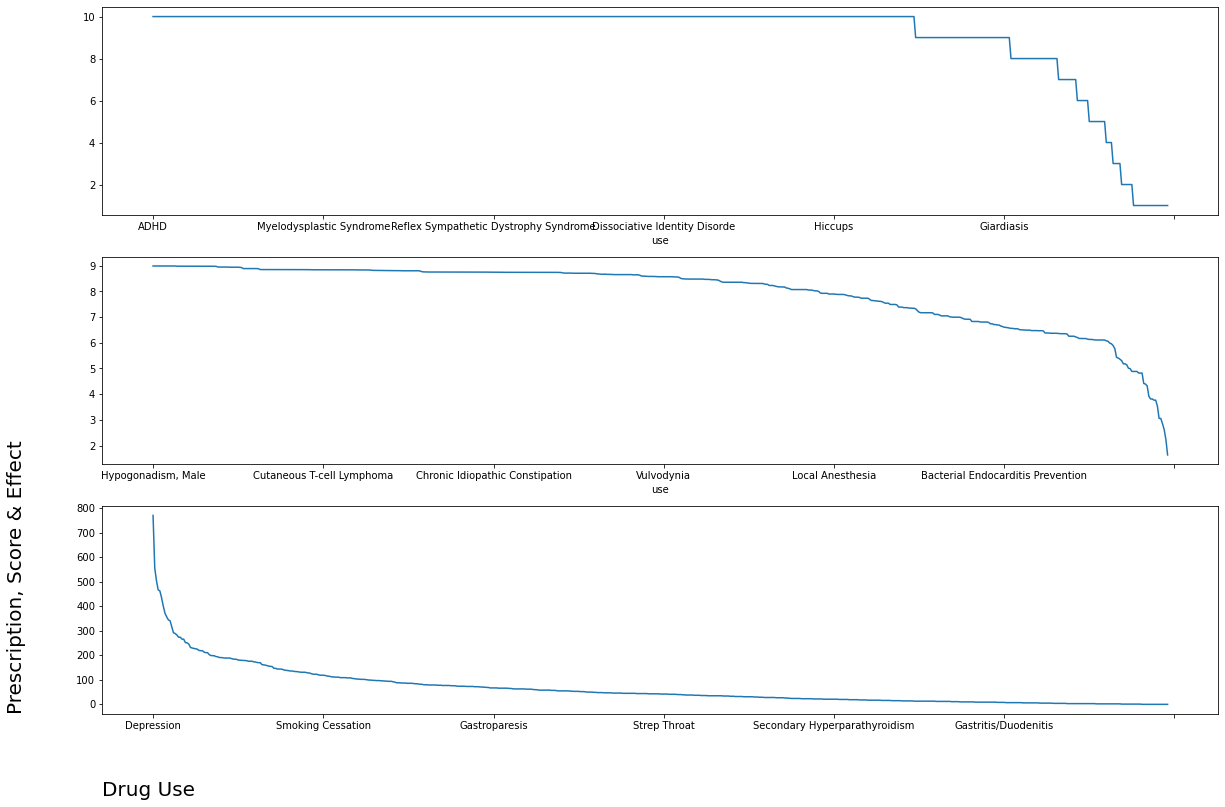

In [35]:
fig, axes = plt.subplots(nrows=3,ncols=1,sharex='row')

dfgt = dff[['name','use','effect','score','presc']]
plot1 = dfgt.groupby(dff.use)['effect'].max().sort_values(ascending=False)
plot2 = dfgt.groupby(dff.use)['score'].max().sort_values(ascending=False)
plot3 = dfgt.groupby(dff.use)['presc'].max().sort_values(ascending=False)

for plot,axes in list(zip([plot1,plot2,plot3],[axes[0],axes[1],axes[2]])):
    plot.plot(kind='line',figsize=(20,13),ax=axes,sharex=False)
axes.set_xlabel("Drug Use",loc='left',labelpad=50,size=20)
axes.set_ylabel("Prescription, Score & Effect",loc='bottom',labelpad=50,size=20)

Grouped by drug use, aggregated by maximun of the respective effect, score and prescription

C:\Users\Manax\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Manax\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='score', ylabel='Density'>

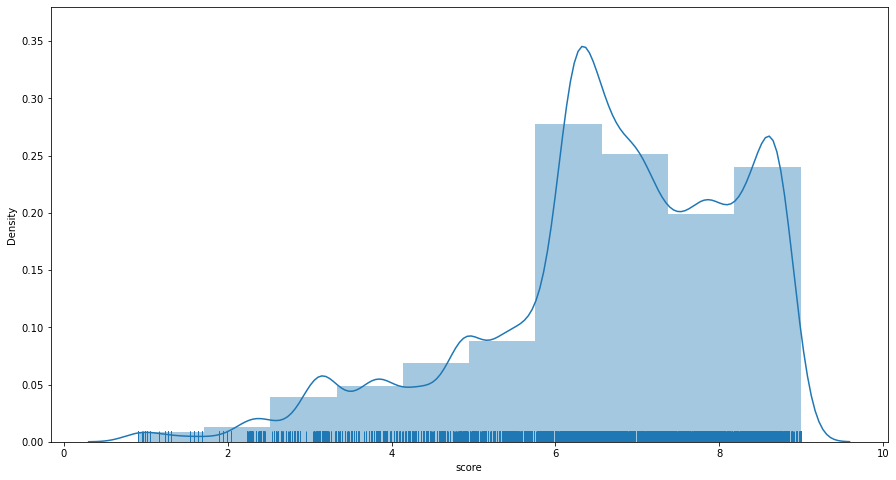

In [36]:
sns.distplot(dfn.score,kde=True,bins=10,rug=True)

Distribution of the base score are negetively skewed and biased towards higher a score.

C:\Users\Manax\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Manax\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='effect', ylabel='Density'>

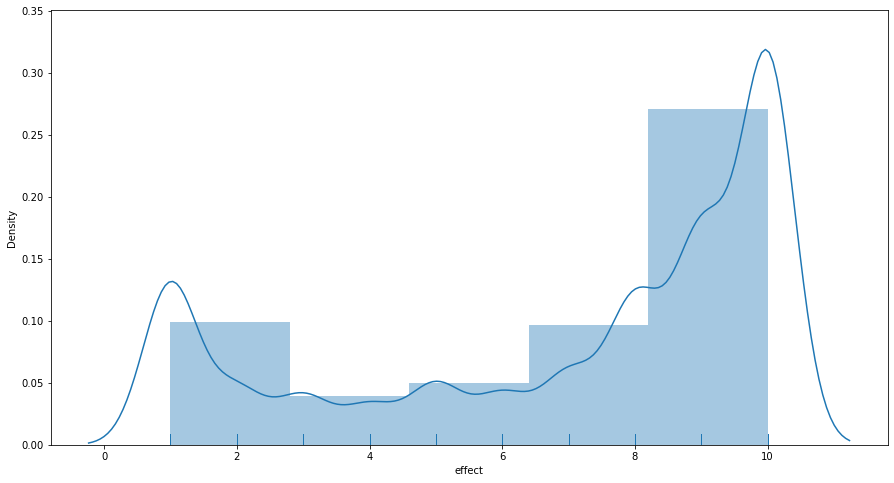

In [37]:
sns.distplot(dfn.effect,kde=True,bins=5,rug=True)

*What are some of the most common prescription cases?*

Text(0, 0.5, '')

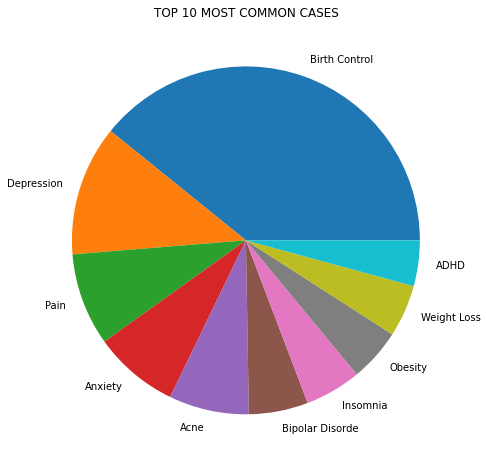

In [38]:
plt.title("TOP 10 MOST COMMON CASES")
dfa.use.value_counts()[:10].plot(kind='pie')
plt.ylabel("")
#clearly the data is from the US/EU

There are some drugs that have never been prescribed, total amounting to 1236 entries. 

In [39]:
dfn[dfn.presc == 0].sort_values(by=['effect'],ascending=False)

review  \
USAGE                              NAME                          PATIENT ID                                                      
High Blood Pressure                Amlodipine / olmesartan       208629      "I was on Benicar for about ten years before m...   
Percutaneous Coronary Intervention Bivalirudin                   75951                          "Excellent one time treatment"   
Constipation                       Polyethylene glycol 3350      43876       "I have a lot to say as this stuff is great! I...   
Birth Control                      Levonorgestrel                165840      "I&#039;m on my second placement of mirena, du...   
Obesity                            Lorcaserin                    76554       "I felt almost no side effect. From a 3500 cal...   
...                                                                                                                        ...   
Otitis Externa                     Ciprofloxacin / dexamethasone 58245       "I developed an outer ear infection after a mo...   
Birth Control                      Etonogestrel                  227687      "I have had the implanon you&#039;re over a ye...   
                                                                 227754      "I had my Implanon inserted June of this year....   
                                                                 227865      "I got the Implanon a year ago in June. Loved ...   
                                   Nexplanon                     109399      "I am 20 years old, 5&#039; 4&quot;. Got it pl...   

                                                                             effect  \
USAGE                              NAME                          PATIENT ID           
High Blood Pressure                Amlodipine / olmesartan       208629          10   
Percutaneous Coronary Intervention Bivalirudin                   75951           10   
Constipation                       Polyethylene glycol 3350      43876           10   
Birth Control                      Levonorgestrel                165840          10   
Obesity                            Lorcaserin                    76554           10   
...                                                                             ...   
Otitis Externa                     Ciprofloxacin / dexamethasone 58245            1   
Birth Control                      Etonogestrel                  227687           1   
                                                                 227754           1   
                                                                 227865           1   
                                   Nexplanon                     109399           1   

                                                                                   UIC  \
USAGE                              NAME                          PATIENT ID              
High Blood Pressure                Amlodipine / olmesartan       208629     2017-11-09   
Percutaneous Coronary Intervention Bivalirudin                   75951      2014-07-21   
Constipation                       Polyethylene glycol 3350      43876      2017-11-24   
Birth Control                      Levonorgestrel                165840     2017-03-18   
Obesity                            Lorcaserin                    76554      2017-05-26   
...                                                                                ...   
Otitis Externa                     Ciprofloxacin / dexamethasone 58245      2017-07-28   
Birth Control                      Etonogestrel                  227687     2012-02-27   
                                                                 227754     2011-11-07   
                                                                 227865     2011-09-04   
                                   Nexplanon                     109399     2017-01-18   

                                                                             presc  \
USAGE                              NAME 

Ill be removing those entries because but saving a copy just in case to compare accuracy.

In [40]:
dfk = dff.set_index('presc').drop(index=0)
dfk.shape[0] + 1236 == dfn.shape[0]

True

*What is the average review length per drug and use?*

In [41]:
drft = list([len(a.split(" ")) for a in dfn['review'].array])

In [42]:
dff["review_length"] = drft
dfn["review_length"] = drft
dff.sort_values(by='review_length',ascending=False)[['name','use','review_length']][:50]

,name,use,review_length
21769,Paroxetine,Social Anxiety Disorde,614
15028,Bisacodyl,Constipation,490
14606,Enbrel,Juvenile Rheumatoid Arthritis,471
15229,Pregabalin,Diabetic Peripheral Neuropathy,471
1776,TriNessa,Birth Control,428
29390,Zocor,High Cholesterol,407
19526,Amitriptyline,Depression,389
20130,Linzess,Irritable Bowel Syndrome,374
20820,Venlafaxine,Depression,374
16926,Moxifloxacin,"Conjunctivitis, Bacterial",370


Above shows the Top 50 longest reviews per drug name

In [43]:
dff.groupby(['use','name'])['review_length'].sum().sort_values(ascending=False)[:50]

use                        name                                                  
Birth Control              Etonogestrel                                              51914
                           Ethinyl estradiol / norethindrone                         39751
                           Levonorgestrel                                            37238
                           Nexplanon                                                 32402
                           Ethinyl estradiol / levonorgestrel                        32173
                           Ethinyl estradiol / norgestimate                          30821
Emergency Contraception    Levonorgestrel                                            20221
Weight Loss                Phentermine                                               19644
Birth Control              Implanon                                                  17183
                           Mirena                                                    15642
Vaginal 

The above shows the longest reviews, grouped by drug use and name, aggregated by summation. We can see that birth control remain the longest reviewed drug case, followed by depression and weight loss. 

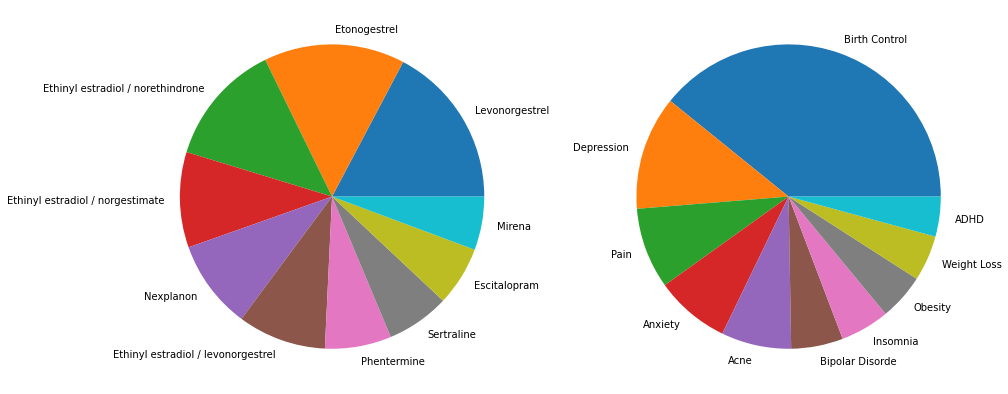

In [44]:
fig,ax = plt.subplots(1,2)

p1 = dff.groupby(['name'])['review_length'].size().sort_values(ascending=False)[:10]
p2 = dff.groupby(['use'])['review_length'].size().sort_values(ascending=False)[:10]

for p,ax in list(zip((p1,p2),(ax[0],ax[1]))):
    p.plot(kind='pie',ax=ax)
    ax.set_ylabel("")

The above pie chart depicts the top 10 most reviewed drug by name and use. 

<AxesSubplot:xlabel='name'>

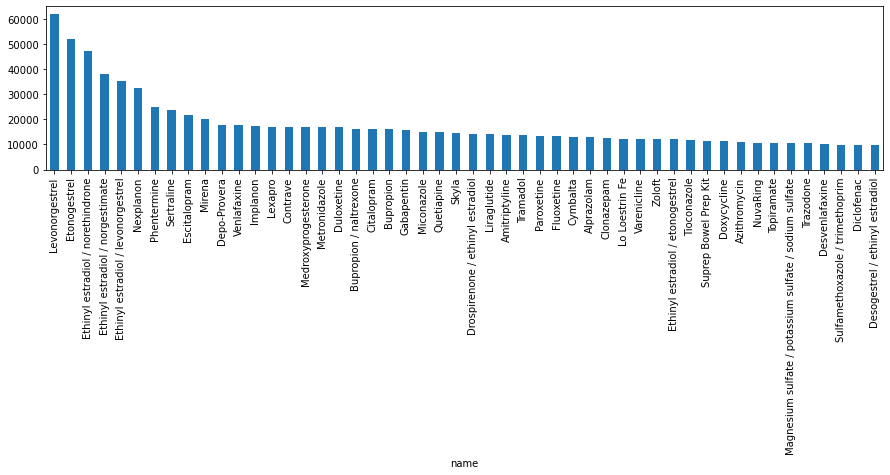

In [45]:
dff.groupby(['name'])['review_length'].sum().sort_values(ascending=False)[:50].plot(kind='bar', figsize=(15,3))

<AxesSubplot:xlabel='use'>

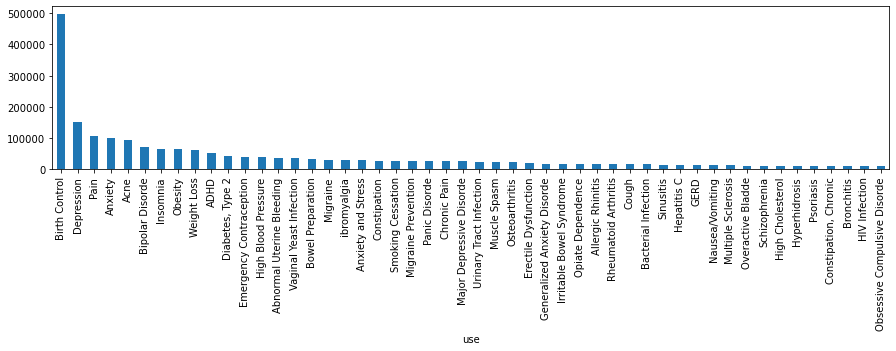

In [46]:
dff.groupby(['use'])['review_length'].sum().sort_values(ascending=False)[:50].plot(kind='bar', figsize=(15,3))

The last two bar charts describe the top 50 most reviewed drugs by name and use.

*How is the prescription distributed, grouped by effect and score?*

array([[<AxesSubplot:title={'center':'effect'}>,
        <AxesSubplot:title={'center':'score'}>],
       [<AxesSubplot:title={'center':'review_length'}>, <AxesSubplot:>]],
      dtype=object)

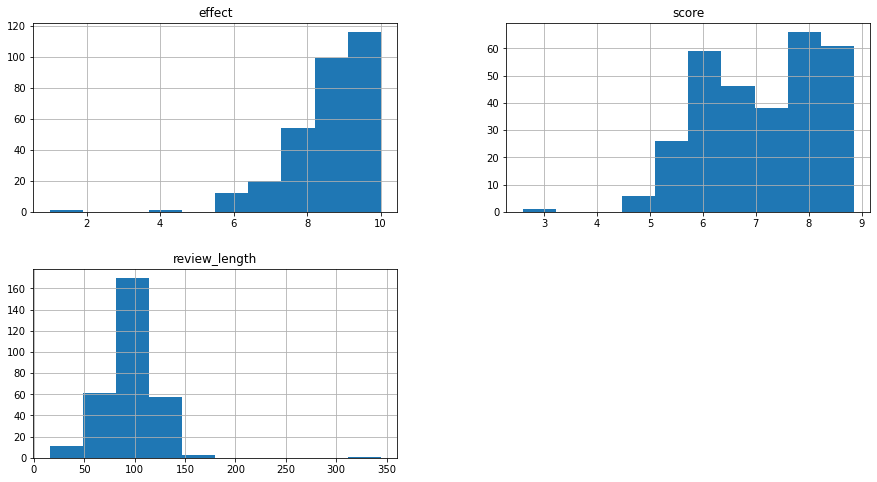

In [47]:
dfn.groupby('presc').mean().hist()

The number of prescription, with respect to drug effect and score, is extremely negetively skewed or biased towards higher effect/score

*How is the ratings distributed, grouped by drug name and use?*

Text(0.5, 0, 'Average ratings')

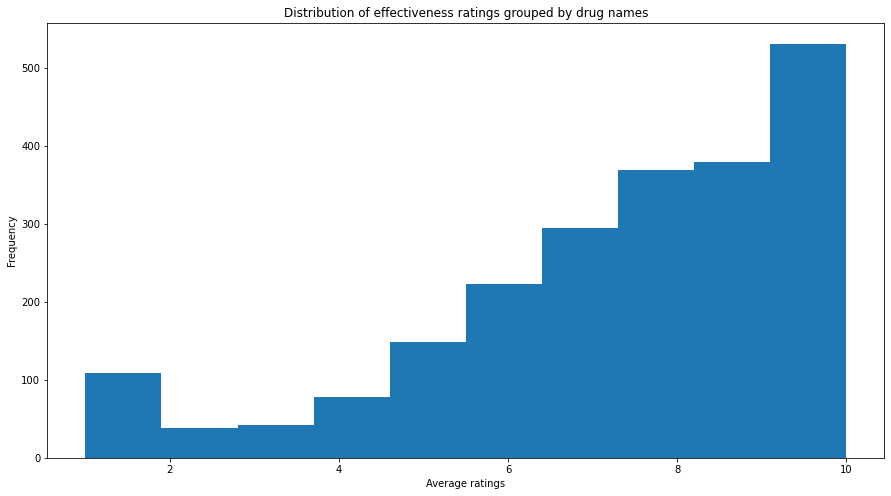

In [48]:
dff['effect'].groupby(dff['name']).mean().sort_values(ascending=False).plot(kind='hist')
plt.title("Distribution of effectiveness ratings grouped by drug names")
plt.xlabel("Average ratings")

Text(0.5, 0, 'Average ratings')

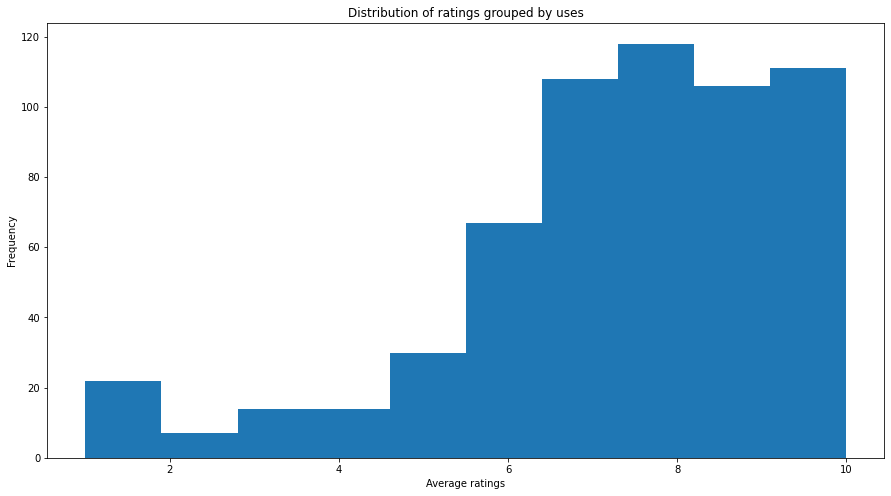

In [49]:
dff['effect'].groupby(dff['use']).mean().sort_values(ascending=False).plot(kind='hist')
plt.title("Distribution of ratings grouped by uses")
plt.xlabel("Average ratings")

Most of the drugs and the use cases for their application, have an overwhelmingly positive effectiveness rating. 

*What is the cross feature relationship among the numeric variables?*

C:\Users\Manax\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 2, 'Lower and higher effect have a larger variance in score in general')

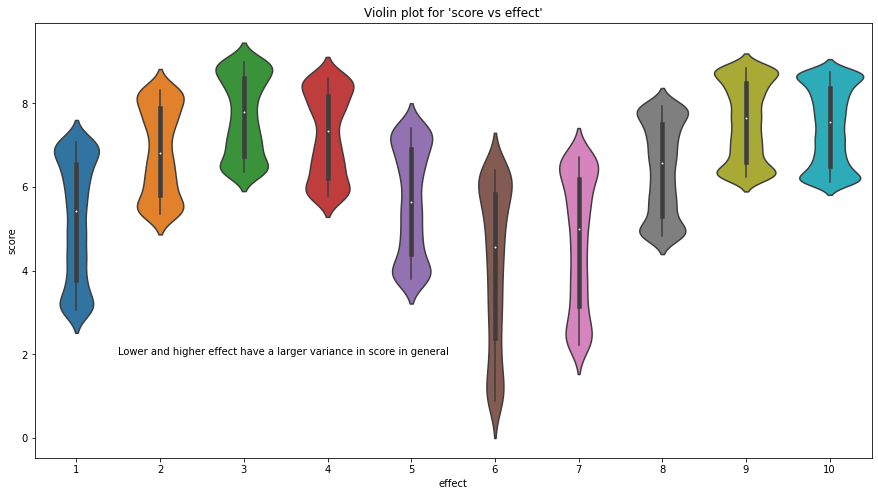

In [50]:
df_num = dff[['effect','score','presc']]
sns.violinplot(dfn['effect'],dfn['score'])
plt.title("Violin plot for 'score vs effect'")
plt.annotate("Lower and higher effect have a larger variance in score in general",(0.5,2))

C:\Users\Manax\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, "Violin plot for 'prescription vs effect'")

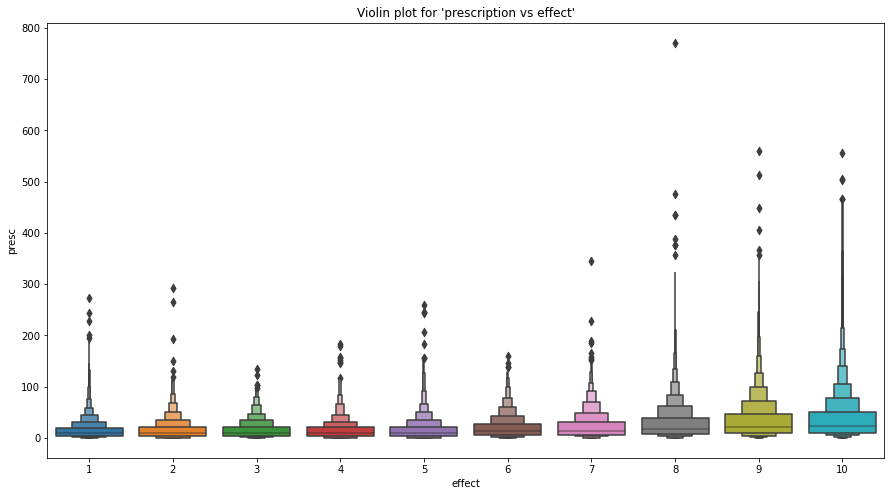

In [51]:
sns.boxenplot(dfn['effect'],dfn['presc'])
plt.title("Violin plot for 'prescription vs effect'")

*How is the UIC approval distribution and how is it related to other features?*

Text(0.5, 1.0, 'Summation of the number of prescriptions, grouped by UIC approved date')

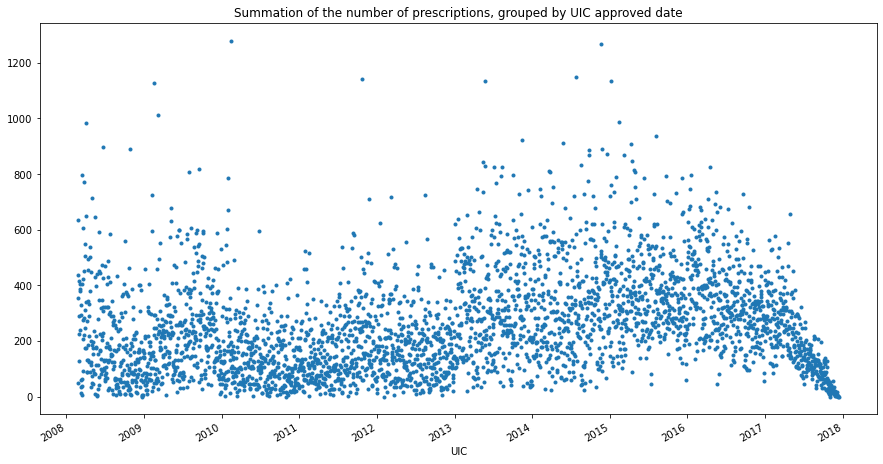

In [52]:
drk = dfn.groupby(dfn['UIC']).sum()
drk['presc'].plot(kind='line',style=".")
plt.title("Summation of the number of prescriptions, grouped by UIC approved date")

C:\Users\Manax\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


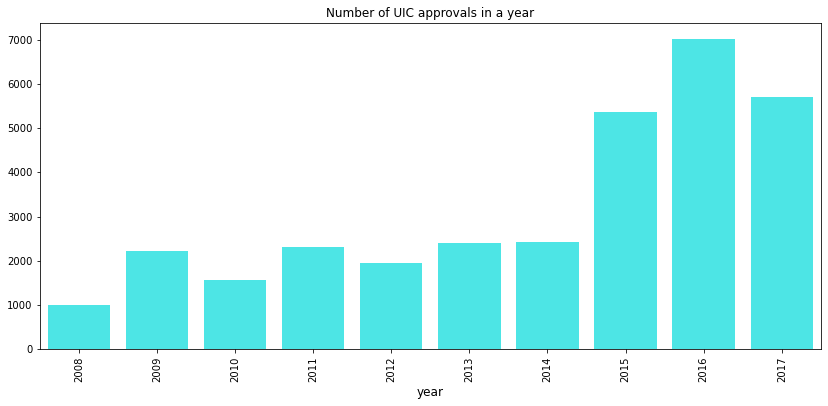

In [53]:
cns = dfn['UIC'].dt.year.value_counts()
cns = cns.sort_index()
plt.figure(figsize=(14,6))
sns.barplot(cns.index, cns.values, alpha=0.8, color='cyan',)
plt.xticks(rotation='vertical')
plt.xlabel('year', fontsize=12)
plt.ylabel('', fontsize=12)
plt.title("Number of UIC approvals in a year")
plt.show()

The above figure suggests most of the approvals were made in the later half of the decade.

In [54]:
ddfn= dfn[dfn["review_length"] > 5]
ddfn = ddfn.sort_values(by='review_length',ascending=False)
ddfn.shape

(31522, 6)

*Review length vs Effect Rating*

<AxesSubplot:xlabel='effect', ylabel='review_length'>

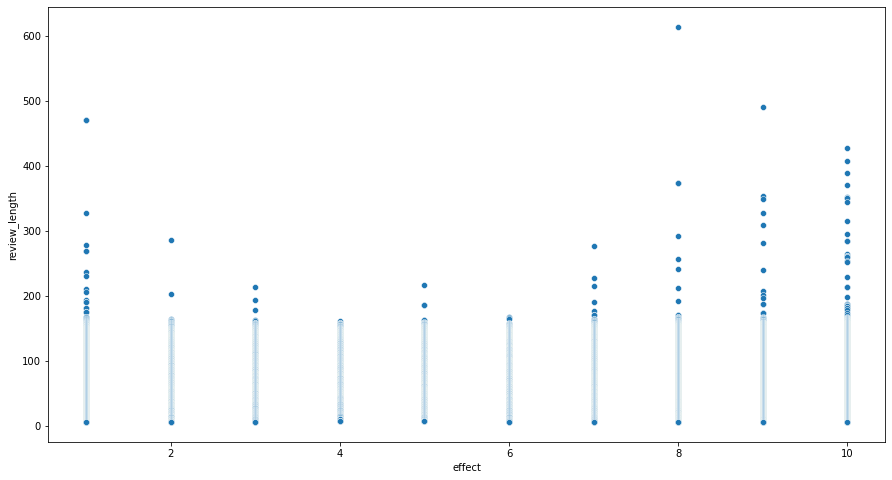

In [55]:
sns.scatterplot(x=ddfn.effect,y=ddfn.review_length)

Storing the drug names for particualar usages in a dictionary sorted by drug effect ratings

In [56]:
DrugUsage = {}

for i in ddfn.reset_index().USAGE.unique():
    temp_ls = []
    
    for j in ddfn.reset_index()[ddfn.reset_index().USAGE == i].NAME.unique():
        if np.sum(ddfn.reset_index().NAME == j) >= 10:
            temp_ls.append((j, np.sum(ddfn.reset_index()[ddfn.reset_index().NAME == j].effect) / np.sum(ddfn.reset_index().NAME == j)))

    DrugUsage[i] = pd.DataFrame(data=temp_ls, 
                                columns=['drug',
                                'average_rating']).sort_values(by='average_rating', 
                                ascending=False).reset_index(drop=True)



<AxesSubplot:xlabel='drug'>

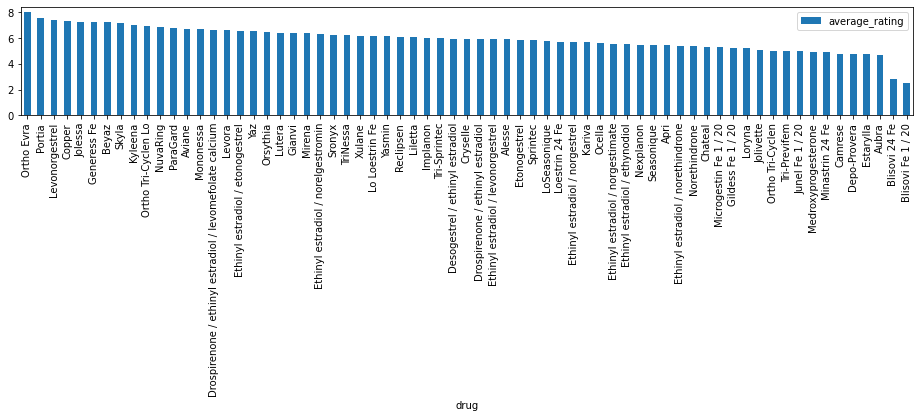

In [57]:
DrugUsage['Birth Control'].set_index('drug')[:100].plot(kind='bar',figsize=(16,2))

In [119]:
DrugUsage['Depression'].set_index('drug')[:100]

,average_rating
drug,
L-methylfolate,9.153846
Alprazolam,9.040000
Clomipramine,9.000000
Rexulti,8.933333
Xanax,8.835165
...,...
Paliperidone,5.764706
Atomoxetine,5.707317
Vilazodone,5.642857


<AxesSubplot:xlabel='drug'>

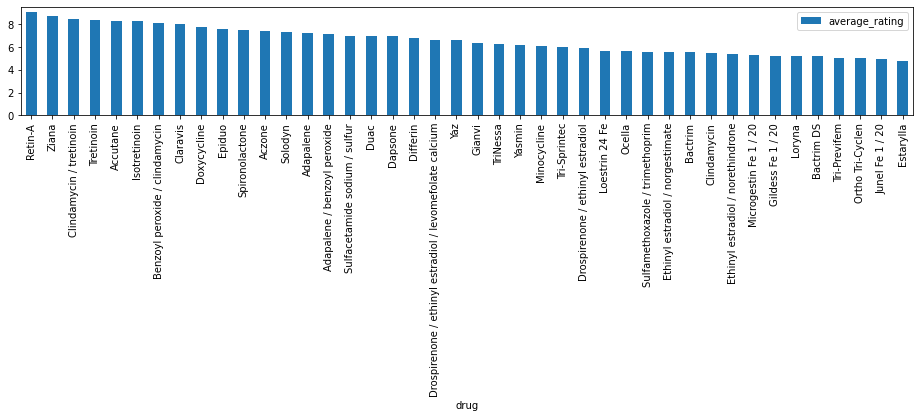

In [59]:
DrugUsage['Acne'].set_index('drug')[:100].plot(kind='bar',figsize=(16,2))

Without doubt, the drugs with higher effect ratings were usually reviewed at greater length and also prescribed in larger quantity. 



### DATA PREPROCESSING FOR NLP
Addition of various NLP based columns to ascertain the sentiment and polarity of the review and to make features for use in modelling of the data.

In [60]:
import regex
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))

from wordcloud import WordCloud, STOPWORDS
stopwords = stop.union(set(STOPWORDS))
more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
stopwords = stopwords.union(more_stopwords)

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

from textblob import TextBlob, Word, Blobber
from nltk.stem import PorterStemmer
st = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Manax\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Manax\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


*Stripping, punctuation, stemming and lemmatization*

In [61]:
def basic_pre(data): #BASIC CORRECTION TO REMOVE ERRORS IN MEASUREMENT 
    review  = list(data.review)
    revi = pd.Series(review,index=data.index)
    revi=revi.str.replace("&#039;", "")
    revi=revi.str.replace("\r","")
    revi=revi.str.replace("\n","")
    revi=revi.str.replace("&quot;","")
    revi=revi.str.replace(";quot&","")
    revi=revi.str.replace("&rsquo;","")
    revi=revi.str.replace("%u201","")
    revi=revi.str.replace("amp;","")
    revi=revi.str.replace("&bull;","")
    revi=revi.str.replace("I9ve","Ive")
    revi=revi.str.replace("[^\w\s]","")
    revi=revi.str.replace("I9m","Im")
    revi=revi.str.replace("Don9t","Dont")
    data['review'] = revi
    return data
    
def adv_pre(data): #LOWERCASE, REMOVE STOPWORDS AND REMOVE LESS FREQUENT WORDS
    revi = data.review
    freq = pd.Series(' '.join(revi).split()).value_counts()
    less_freq = list(freq[freq == 1].index)
    revi=revi.apply(lambda x: " ".join(x.lower() for x in x.split()))
    revi=revi.apply(lambda x: " ".join(x for x in x.split() if x not in stopwords))
    revi=revi.apply(lambda x: " ".join(x for x in x.split() if x not in less_freq))
    data['review'] = revi
    return data


def stem_lemma(data): #STEMMING, LEMMATIZATION AND POLARITY 
    revi = data.review
    revi = revi.apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
    revi = revi.apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
    pol = revi.map(lambda text: TextBlob(text).sentiment.polarity)
    data["polarity"] = pol
    data['review_stem'] = revi
    return data

Activating the above text processing (takes 15-20 mins)

In [62]:
ddfn = stem_lemma(adv_pre(basic_pre(ddfn)))
ddfn=ddfn.drop(['UIC','review','review_length'],axis=1)
ddfn.to_csv("Train_modelling_stem.csv")

C:\Users\Manax\AppData\Local\Temp\ipykernel_18140\2702436509.py:14: FutureWarning: The default value of regex will change from True to False in a future version.
  revi=revi.str.replace("[^\w\s]","")


Activating test dataset

In [63]:
freq = pd.Series(' '.join(dfn_test.review).split()).value_counts()
less_freq = list(freq[freq == 1].index)
dfn_test = basic_pre(dfn_test)
dfn_test = adv_pre(dfn_test)
dfn_test = stem_lemma(dfn_test)
dfn_test = dfn_test.drop(['UIC','review'],axis=1)
dfn_test.to_csv("Test_modelling_stem.csv")


C:\Users\Manax\AppData\Local\Temp\ipykernel_18140\2702436509.py:14: FutureWarning: The default value of regex will change from True to False in a future version.
  revi=revi.str.replace("[^\w\s]","")


*Polarity histogram*

<AxesSubplot:>

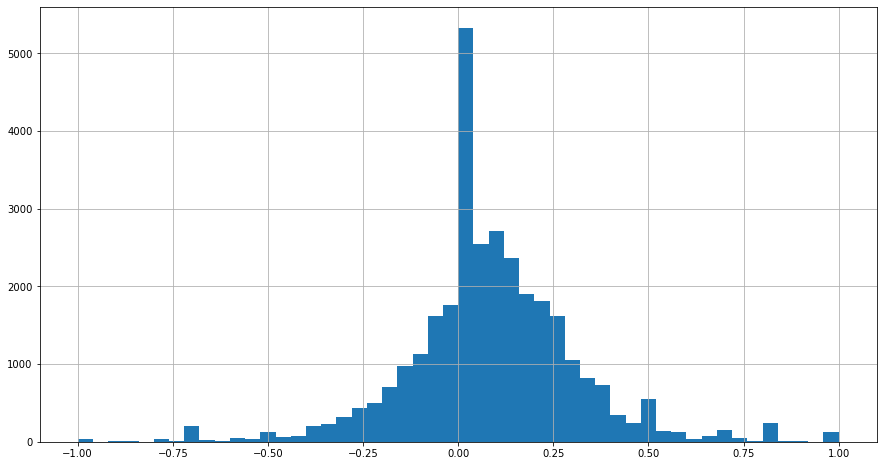

In [64]:
ddfn['polarity'].hist(bins=50)

Text(0.5, 1.0, 'TOP 50 DRUGS BY POLARITY')

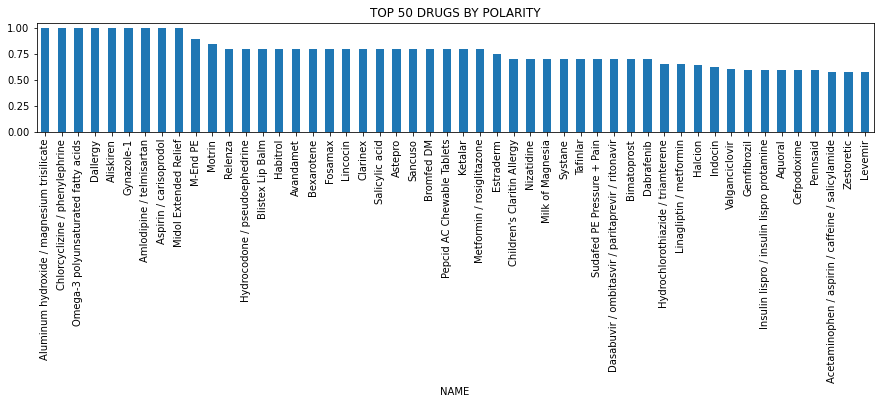

In [65]:
sort = ddfn.reset_index().sort_values(by='polarity',ascending=False)
sort.groupby('NAME').mean().sort_values(by='polarity',ascending=False)['polarity'][:50].plot(kind='bar',figsize=(15,2));plt.title("TOP 50 DRUGS BY POLARITY")

Text(0.5, 1.0, 'TOP 50 USES BY POLARITY')

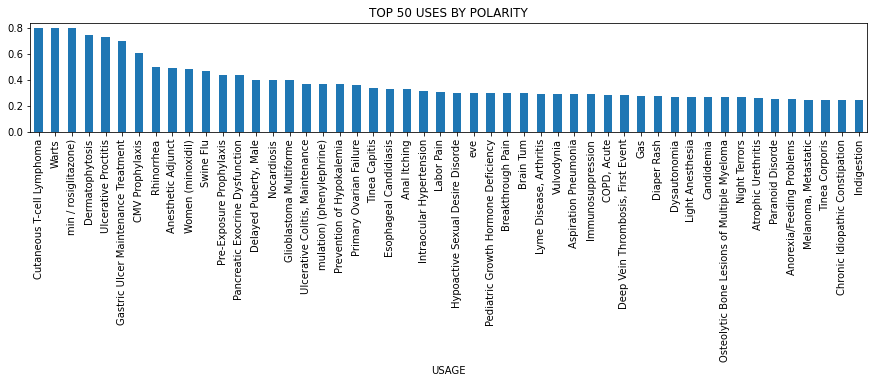

In [66]:
sort.groupby('USAGE').mean().sort_values(by='polarity',ascending=False)['polarity'][:50].plot(kind='bar',figsize=(15,2));plt.title("TOP 50 USES BY POLARITY")

*Word Cloud*

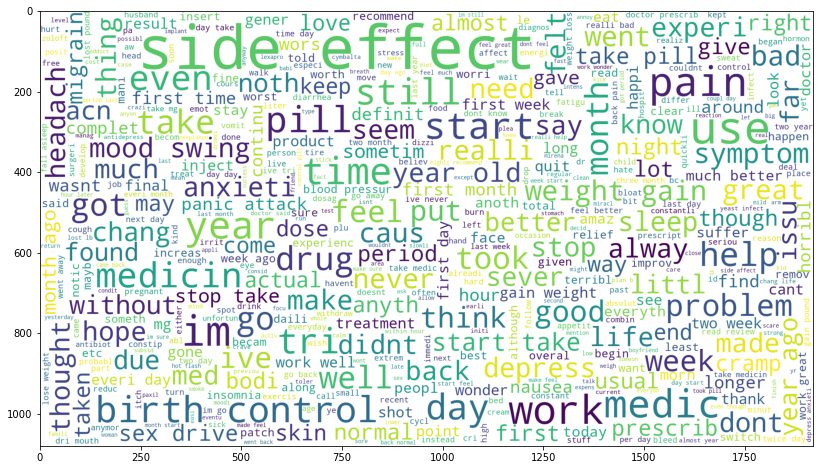

In [67]:
wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = 500,
                    max_font_size = 150, 
                    random_state = 42,
                    width=1920,
                    height=1080,
                    mask = None)

wordcloud.generate("".join(list(ddfn.review_stem)))
plt.imshow(wordcloud)

All the highlighted words are relevant to the drug review sentiment analysis.

### MACHINE LEARNING MODEL

In [104]:
import time
import pickle as pkl
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score, mean_absolute_percentage_error, mean_squared_error, mean_absolute_error, classification_report, precision_recall_fscore_support
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import ElasticNet, LinearRegression, LogisticRegression, SGDClassifier
from sklearn.model_selection import train_test_split


model_data = ddfn[['review_stem','effect','presc','polarity','score']]
model_test = dfn_test[['review_stem','effect','presc','polarity']]
model_data_classi = ddfn[['effect','presc','polarity']]
model_data_classi_test = dfn_test[['effect','presc','polarity']]
model_data_classi['pos_neg'] = model_data["effect"].apply(lambda x: 1 if x > 5 else 0)

C:\Users\Manax\AppData\Local\Temp\ipykernel_18140\3583072743.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data_classi['pos_neg'] = model_data["effect"].apply(lambda x: 1 if x > 5 else 0)


In [105]:
model_data.to_csv("Model_train.csv")
model_test.to_csv("Model_test.csv")

In [106]:
model_data_classi.to_csv("model_data_classi.csv")
model_data_classi_test.to_csv("model_data_classi_test.csv")

**Regression Analysis**

SLR & ElasticNet

*ElasticNet*

In [107]:
model1 = ElasticNet(alpha=1.0,
    l1_ratio=0.24,
    fit_intercept=True,
    normalize=True,
    precompute=False,
    max_iter=1000)
ind = model_data.drop(['score','review_stem'],axis=1)
tar = model_data.score
(xtr,xte,ytr,yte) = train_test_split(ind,tar,shuffle=True)
#FITTING A SPLIT OF TRAINING DATA
model1.fit(xtr,ytr)
ypred = model1.predict(xte)
print(f"MAE = {mean_absolute_error(yte,ypred)}, MSE = {mean_squared_error(yte,ypred)}")

MAE = 1.2118022750583324, MSE = 2.45285595770682


C:\Users\Manax\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(


In [108]:
#FITTING SLR MODEL TO THE ENTIRE TRAINING DATA AND SAVING PKL

model2.fit(ind,tar)
ypred_reg = model2.predict(model_data_classi_test)
pkl.dump(model2,open("Model2_SLR_reg",'wb'))

*Simple Linear Regression*

In [109]:
model2 = LinearRegression().fit(xtr,ytr)
ypred = model2.predict(xte)
print(f"MAE = {mean_absolute_error(yte,ypred)}, MSE = {mean_squared_error(yte,ypred)}")

MAE = 1.1369449843467898, MSE = 2.0385520734617373


**Classification Ananlysis**

SGDClassifier, LogisticRegression, MultinomialNB, RandomForestClassifier

*Stochastic Gradient Descent Classifier*

In [110]:
model3 = SGDClassifier(loss='hinge',
    penalty='l2',
    alpha=0.0001,
    l1_ratio=0.15,
    fit_intercept=True,
    max_iter=1000,
    tol=0.001,
    shuffle=True,
    verbose=0,
    epsilon=0.1,
    n_jobs=None,
    random_state=None,
    learning_rate='optimal',
    eta0=0.0,
    power_t=0.5,
    early_stopping=False,
    validation_fraction=0.1,
    n_iter_no_change=5,
    class_weight=None,
    warm_start=False,)
ind = model_data_classi.drop(['pos_neg'],axis=1)
tar = model_data_classi.pos_neg
(xtr,xte,ytr,yte) = train_test_split(ind,tar,shuffle=True)
model3.fit(xtr,ytr)
ypred = model3.predict(xte)
print(f"Accuracy = {accuracy_score(yte,ypred)}")
print(f"{classification_report(yte,ypred)}")

Accuracy = 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2336
           1       1.00      1.00      1.00      5545

    accuracy                           1.00      7881
   macro avg       1.00      1.00      1.00      7881
weighted avg       1.00      1.00      1.00      7881



*Logistic Regression*

In [111]:
model4 = LogisticRegression(penalty='l2',
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,).fit(xtr,ytr)
ypred = model4.predict(xte)
print(f"Accuracy = {accuracy_score(yte,ypred)}")
print(f"{classification_report(yte,ypred)}")

Accuracy = 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2336
           1       1.00      1.00      1.00      5545

    accuracy                           1.00      7881
   macro avg       1.00      1.00      1.00      7881
weighted avg       1.00      1.00      1.00      7881



*Multinomial Naive Bayes*

In [112]:
model5 = MultinomialNB(alpha=1.0, fit_prior=False, class_prior=None).fit(xtr.drop('polarity',axis=1),ytr)
ypred = model5.predict(xte.drop('polarity',axis=1))
print(f"Accuracy = {accuracy_score(yte,ypred)}")
print(f"{classification_report(yte,ypred)}")

Accuracy = 0.6773252125364801
              precision    recall  f1-score   support

           0       0.46      0.49      0.48      2336
           1       0.78      0.75      0.77      5545

    accuracy                           0.68      7881
   macro avg       0.62      0.62      0.62      7881
weighted avg       0.68      0.68      0.68      7881



*Random Forest Classifier*

In [113]:
model6 = RandomForestClassifier(
    n_estimators=200,
    criterion='entropy',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,).fit(xtr,ytr)
ypred = model6.predict(xte)
print(f"Accuracy = {accuracy_score(yte,ypred)}")
print(f"{classification_report(yte,ypred)}")


Accuracy = 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2336
           1       1.00      1.00      1.00      5545

    accuracy                           1.00      7881
   macro avg       1.00      1.00      1.00      7881
weighted avg       1.00      1.00      1.00      7881



In [114]:
from sklearn.metrics import ConfusionMatrixDisplay, PrecisionRecallDisplay, plot_confusion_matrix, precision_score, recall_score

In [ ]:
model_test_pred.to_csv("Test_RandomForest_binary.csv")

**Reviews as features, Comparing results with score predicted by numeric features**

*tf-idf vectorizers*

In [75]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(model_data.review_stem)
X_test = vectorizer.transform(model_test.review_stem)
Y_train = model_data_classi.pos_neg

In [76]:
sd = CountVectorizer()
vectorizer = TfidfVectorizer(input='content')

In [77]:
vectorizer.fit_transform([model_data.review_stem[0]])

<1x136 sparse matrix of type '<class 'numpy.float64'>'
	with 136 stored elements in Compressed Sparse Row format>

In [78]:
model_test_pred = pd.read_csv('Test_RandomForest_binary.csv')
model_test_pred2 = pd.read_csv("Test_RandomForest_score.csv")

*Regression - ElasticNet*

In [79]:
model1.fit(X_train,Y_train)
y_pred = model1.predict(X_test)
print(f"MAE = {mean_absolute_error(model_test_pred2.Predicted,y_pred)}, MSE = {mean_squared_error(model_test_pred2.Predicted,y_pred)}")


C:\Users\Manax\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(


MAE = 0.3384665999887026, MSE = 0.1532851934030015


*SLR*

In [80]:
model2.fit(X_train,Y_train)
y_pred = model2.predict(X_test)
print(f"MAE = {mean_absolute_error(model_test_pred2.Predicted,y_pred)}, MSE = {mean_squared_error(model_test_pred2.Predicted,y_pred)}")


MAE = 0.3310409754611459, MSE = 0.21093315717337321


*Classification - RandomForest*

In [81]:
model6.fit(X_train,Y_train)
y_pred = model6.predict(X_test)
print(f"Accuracy = {accuracy_score(model_test_pred.Predicted,y_pred)}")
print(f"{classification_report(model_test_pred.Predicted,y_pred)}")

NameError: name 'model6' is not defined

In [ ]:
pkl.dump(model6,open("Model6_RFC_cls",'wb'))

*Classification - LogisticRegression*

In [ ]:
model4.fit(X_train,Y_train)
y_pred = model4.predict(X_test)
print(f"Accuracy = {accuracy_score(model_test_pred.Predicted,y_pred)}")
print(f"{classification_report(model_test_pred.Predicted,y_pred)}")

In [ ]:
exp = model_data.review_stem[9]
model4.predict(vectorizer.transform([exp]))

In [ ]:
exp

In [ ]:
#SAVING MODEL TO PICKLE
pkl.dump(model4,open("Model4_log_cls",'wb'))

**Simple Feedforward Neural Network**

In [82]:
b = "'@#$%^()&*;!.-"
X_train = np.array(model_data['review_stem'])
X_test = np.array(model_test['review_stem'])

def clean(X):
    for index, review in enumerate(X):
        for char in b:
            X[index] = X[index].replace(char, "")
    return(X)

X_train = clean(X_train)
X_test = clean(X_test)


In [86]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

vectorizer = CountVectorizer(analyzer = 'word', 
                             tokenizer = None,
                             preprocessor = None, 
                             stop_words = None, 
                             min_df = 2,
                             ngram_range=(4, 4),
                             max_features = 6000
                            )
pipeline = Pipeline([
    ('vect', vectorizer),
])

In [87]:
%time train_data_features = pipeline.fit_transform(X_train)
%time test_data_features = pipeline.transform(X_test)

Wall time: 4.06 s
Wall time: 404 ms


In [88]:
y_train = model_data_classi.pos_neg
y_test = model_test_pred.Predicted
y_train.shape,y_test.shape,train_data_features.shape,test_data_features.shape

((31522,), (10700,), (31522, 6000), (10700, 6000))

In [89]:
import keras
from keras.models import Sequential
from keras.layers import Dense
import random


mod = keras.models.Sequential()

mod.add(keras.layers.Dense(500, input_shape=(6000,)))
mod.add(keras.layers.BatchNormalization())
mod.add(keras.layers.Activation('relu'))
mod.add(keras.layers.Dropout(0.9))

mod.add(keras.layers.Dense(200))
mod.add(keras.layers.BatchNormalization())
mod.add(keras.layers.Activation('relu'))
mod.add(keras.layers.Dropout(0.7))

mod.add(keras.layers.Dense(100, activation='relu'))
mod.add(keras.layers.Dense(10, activation='relu'))

mod.add(keras.layers.Dense(1, activation='sigmoid'))

mod.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

mod.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               3000500   
                                                                 
 batch_normalization (BatchN  (None, 500)              2000      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 500)               0         
                                                                 
 dropout (Dropout)           (None, 500)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               100200    
                                                                 
 batch_normalization_1 (Batc  (None, 200)              800       
 hNormalization)                                        

In [90]:
train_data_features = train_data_features.toarray()
test_data_features = test_data_features.toarray()

hist = mod.fit(train_data_features, y_train, epochs=15, batch_size=128)



Epoch 1/15
247/247 [==============================] - 4s 12ms/step - loss: 0.6287 - accuracy: 0.6934
Epoch 2/15
247/247 [==============================] - 3s 12ms/step - loss: 0.6162 - accuracy: 0.7007
Epoch 3/15
247/247 [==============================] - 3s 12ms/step - loss: 0.6138 - accuracy: 0.7010
Epoch 4/15
247/247 [==============================] - 3s 12ms/step - loss: 0.6091 - accuracy: 0.7010
Epoch 5/15
247/247 [==============================] - 3s 12ms/step - loss: 0.6031 - accuracy: 0.7010
Epoch 6/15
247/247 [==============================] - 3s 12ms/step - loss: 0.5935 - accuracy: 0.7011
Epoch 7/15
247/247 [==============================] - 3s 12ms/step - loss: 0.5819 - accuracy: 0.7100
Epoch 8/15
247/247 [==============================] - 3s 12ms/step - loss: 0.5679 - accuracy: 0.7206
Epoch 9/15
247/247 [==============================] - 3s 12ms/step - loss: 0.5573 - accuracy: 0.7299
Epoch 10/15
247/247 [==============================] - 3s 12ms/step - loss: 0.5480 - accura

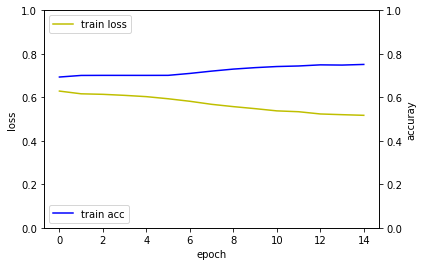

In [91]:
%matplotlib inline

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.set_ylim([0.0, 1.0])
acc_ax.set_ylim([0.0, 1.0])

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [92]:
loss_and_metrics = mod.evaluate(test_data_features, y_test, batch_size=128)
print('loss_and_metrics : ' + str(loss_and_metrics))

84/84 [==============================] - 1s 5ms/step - loss: 0.6060 - accuracy: 0.6971
loss_and_metrics : [0.6059563755989075, 0.6971027851104736]


In [93]:
sub_preds_deep = mod.predict(test_data_features,batch_size=32)

335/335 [==============================] - 1s 2ms/step


In [94]:
Y_pred_DL = pd.Series(sub_preds_deep.reshape((10700,))).apply(lambda x: 1 if x>0.5 else 0)

In [95]:
accuracy_score(model_test_pred.Predicted,Y_pred_DL)

0.6971028037383178

**BiDirectional LSTM**

In [96]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import text
from keras.utils import np_utils
from keras.models import Sequential
class Keras_Tokenizer():

    
    def __init__(self,max_features):
        
        self.max_features =6000
        
        
        print("Tokenizer object created")
        
        
    def __label_encoding(self,y_train):
        """
        Encode the given list of class labels
        :y_train_enc: returns list of encoded classes
        :labels: actual class labels
        """
        lbl_enc = LabelEncoder()

        y_train_enc = lbl_enc.fit_transform(y_train)
        labels = lbl_enc.classes_

        return y_train_enc, labels
    
    
    
    def __word_embedding(self,train, test, max_features, max_len=200):
        
        
        try:
            """ Keras Tokenizer class object """
            tokenizer = text.Tokenizer(num_words=max_features)
            tokenizer.fit_on_texts(train)

            train_data = tokenizer.texts_to_sequences(train)
            test_data = tokenizer.texts_to_sequences(test)

            """ Get the max_len """
            vocab_size = len(tokenizer.word_index) + 1

            """ Padd the sequence based on the max-length """
            x_train = sequence.pad_sequences(train_data, maxlen=max_len, padding='post')
            x_test = sequence.pad_sequences(test_data, maxlen=max_len, padding='post')
            """ Return train, test and vocab size """
            return tokenizer, x_train, x_test, vocab_size
        except ValueError as ve:
            raise(ValueError("Error in word embedding {}".format(ve)))
            
            
    def preprocess(self,X_train, X_test):
        
    
        return self.__word_embedding(X_train, X_test, self.max_features)

In [97]:
KT = Keras_Tokenizer(6000)


Tokenizer object created


In [98]:
tokenizer, x_pad_train, x_pad_valid, vocab_size = KT.preprocess(X_train, X_test)


In [99]:
x_pad_train.shape,x_pad_valid.shape,vocab_size


((31522, 200), (10700, 200), 18161)

In [100]:
class RNN_Bidirectional_lstm_Build_Pack():
    def __init__(self,
                 input_length,
                 output_length,
                 vocab_size,
                 optimizer,
                 loss,
                 metrics,
                 batch_size,
                 epochs,
                 verbose):
        
        self.input_length =200
        self.output_length= 200
        self.vocab_size = 18161
        self.optimizer = 'adam'
        self.loss = 'binary_crossentropy'
        self.metrics = ['acc']
        self.batch_size = 256
        self.epochs = 20
        self.verbose = 1
                   
        print("Tokenizer object created")
        
    def build_rnn(self,vocab_size,output_dim, input_dim):

        model = Sequential([
            keras.layers.Embedding(self.vocab_size,output_dim = self.output_length,
                                  input_length = self.input_length),
            keras.layers.BatchNormalization(),
            keras.layers.Bidirectional(keras.layers.LSTM(256,return_sequences=True)),
            keras.layers.GlobalMaxPool1D(),
            keras.layers.Dense(225,activation='relu'),
            keras.layers.Dropout(0.3),
            keras.layers.Dense(150,activation='relu'),
            keras.layers.Dropout(0.2),
            keras.layers.Dense(95,activation='relu'),
            keras.layers.Dropout(0.2),
            keras.layers.Dense(64,activation='relu'),
            keras.layers.Dropout(0.1),
            keras.layers.Dense(34,activation='relu'),
            keras.layers.Dropout(0.1),
            keras.layers.Dense(32,activation='relu'),
            keras.layers.Dense(output_dim, activation='sigmoid')
        ])

        return model
    
    def Compile_and_Fit(self,rnn_model):
        
        try:
    
            rnn_model.compile(optimizer=self.optimizer, loss=self.loss, metrics=self.metrics)


            rnn_model.fit(x_pad_train, 
                                    y_train,
                                    batch_size=self.batch_size,
                                   epochs=self.epochs,
                                   verbose= self.verbose)

            score = rnn_model.evaluate(x_pad_valid, y_test, verbose=1)

            print("Loss:%.3f Accuracy: %.3f" % (score[0], score[1]))

            return rnn_model
        
        except ValueError as Model_Error:
            raise(ValueError("Model Compiling Error {}".format(Model_Error)))

In [101]:
Rnn_Model = RNN_Bidirectional_lstm_Build_Pack(200,200,18161,'adam','binary_crossentropy',['acc'],256,10,1)


Tokenizer object created


In [102]:
rnn_model = Rnn_Model.build_rnn(vocab_size,1,200)
rnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 200)          3632200   
                                                                 
 batch_normalization_2 (Batc  (None, 200, 200)         800       
 hNormalization)                                                 
                                                                 
 bidirectional (Bidirectiona  (None, 200, 512)         935936    
 l)                                                              
                                                                 
 global_max_pooling1d (Globa  (None, 512)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense_5 (Dense)             (None, 225)               115425    
                                                      

In [103]:
rnn_model = Rnn_Model.Compile_and_Fit(rnn_model)


Epoch 1/20
124/124 [==============================] - 182s 1s/step - loss: 0.5332 - acc: 0.7360
Epoch 2/20
124/124 [==============================] - 173s 1s/step - loss: 0.3719 - acc: 0.8383
Epoch 3/20
124/124 [==============================] - 182s 1s/step - loss: 0.2829 - acc: 0.8844
Epoch 4/20
124/124 [==============================] - 168s 1s/step - loss: 0.1979 - acc: 0.9220
Epoch 5/20
124/124 [==============================] - 172s 1s/step - loss: 0.1212 - acc: 0.9550
Epoch 6/20
124/124 [==============================] - 182s 1s/step - loss: 0.0770 - acc: 0.9721
Epoch 7/20
124/124 [==============================] - 185s 1s/step - loss: 0.0519 - acc: 0.9805
Epoch 8/20
124/124 [==============================] - 172s 1s/step - loss: 0.0380 - acc: 0.9866
Epoch 9/20
 87/124 [====================>.........] - ETA: 52s - loss: 0.0254 - acc: 0.9911

KeyboardInterrupt: 